In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch

%matplotlib inline

Here we test some feedback alignment learning:

In [524]:
class LinearNN:
    # Creates a three-layer linear neural network to approximate a linear
    # function Lin_map, using datapoints X (columns of X are each a point)
    def __init__(self, Lin_map, X):
        # Actual target linear function to learn
        self.L = Lin_map
        M, N = Lin_map.shape
        H = int((M + N) / 2)
        
        # Layers of our neural network
        self.W0 = np.random.normal(scale=0.1, size=(H, N))
        self.W = np.random.normal(scale=0.1, size=(M, H))
        
        # training data and labels
        self.X = X
        self.y = np.matmul(self.L, self.X)
        
    def backprop(self, lr = 0.0000001, n_epochs=20000, batch_size=50):
        errors = []
        for epoch in range(n_epochs):
            batch_inds = np.random.randint(self.X.shape[1], 
                                           size=batch_size)
            X_batch = self.X[:, batch_inds]
            # create an approximation for y using our NN
            # first compute hidden layer activity
            h = np.matmul(self.W0, X_batch)
            # then output activity
            y_est = np.matmul(self.W, h)
            error = self.y[:, batch_inds] - y_est
            errors.append(np.linalg.norm(error))
            # Backprop weight updates for our NN
            self.W += lr * np.dot(error, h.T)
            self.W0 += lr * np.dot(self.W.T, np.dot(error, X_batch.T))
            if epoch % 1000 == 0:
                print(np.linalg.norm(error))
        return errors
    
    def feedback_align(self, lr = 0.000001, 
                       n_epochs=20000, batch_size=50):
        # our random matrix B for learning
        B = np.random.normal(size=self.W.shape)
        errors = []
        for epoch in range(n_epochs):
            batch_inds = np.random.randint(self.X.shape[1], 
                                           size=batch_size)
            X_batch = self.X[:, batch_inds]
            # create an approximation for y using our NN
            # first compute hidden layer activity
            h = np.matmul(self.W0, X_batch)
            # then output activity
            y_est = np.matmul(self.W, h)
            error = self.y[:, batch_inds] - y_est
            errors.append(np.linalg.norm(error))
            # Backprop weight updates for our NN
            self.W += lr * np.dot(error, h.T)
            self.W0 += lr * np.dot(B.T, np.dot(error, X_batch.T))
            if epoch % 1000 == 0:
                print(np.linalg.norm(error))
        return errors

In [525]:
# Target linear function to learn
L = np.random.normal(scale=0.1, size=(10, 30))

# Training data
X = np.random.normal(0, 1, size=(30, 10000))

model1 = LinearNN(L, X)
model2 = LinearNN(L, X)

err1 = model1.backprop(lr=0.00001, n_epochs=10000, batch_size=100)
err2 = model2.feedback_align(lr=0.00001, n_epochs=10000, batch_size=100)

19.163153114299913
13.422509424755063
9.252987595917467
6.174149260987884
4.4178433059385105
3.2938230996707185
2.368957567972501
1.8524790057809581
1.3752070675235901
1.0969302745338887
20.083252330783978
5.506673222543614
1.5694548226747893
0.6050853342991594
0.30545318328227744
0.1302874549154682
0.06145108848281901
0.02820696275108192
0.013212447671870476
0.0057799336919982566


And we can plot the error as a function of the number of completed epochs of training for each algorithm:

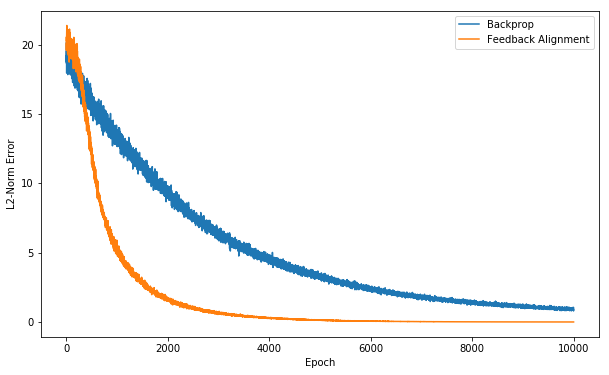

In [527]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(err1)), err1, label='Backprop')
plt.plot(range(len(err2)), err2, label='Feedback Alignment')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('L2-Norm Error')
plt.show()